# Using serum cholesterol and resting blood pressure to classify heart disease patients from Cleveland 
#### Francesca Zhen Li 

## Introduction

Heart disease is any condition that affects the structure or function of the heart. It is a group of conditions with many different root causes. One of these conditions of heart disease is coronary artery disease, which is when the major blood arteries that send blood to the heart narrow (Heart&Stroke, n.d.). Some of the causes include high blood pressure and high cholesterol levels (Mayo Clinic, 2022).

High levels of cholesterol cause fatty deposits to develop on the inner walls of the arteries. When these deposits grow, blood flow through the arteries may decrease. In addition, these deposits can sometimes break and form a clot that can cause a heart attack or stroke (Mayo Clinic, 2023). High blood pressure causes the heart arteries to stiffen and harden. This may cause the arteries to become narrow, slowing blood flow to the heart. (Mayo Clinic, 2022).

This project aims to use these risk factors to classify patients from Cleveland based on the chance of having heart disease. 

The question that this project will address is: **Will the patient have heart disease based on their blood pressure and cholesterol levels?**

## Preliminary exploratory data analysis

In [1]:
#importing libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [7]:
set.seed(1)
#reading the dataset from URL, assigning column names and column types
cleveland_processed <- read_csv("data/heart_disease/processed.cleveland.data", 
                      col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                                    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))
cleveland_processed[cleveland_processed == "?"] <- NA
cleveland_processed
cleveland_data <- cleveland_processed |>
  mutate(sex = factor(sex, levels = c(0, 1), labels = c("female", "male")), cp = as.factor(as.integer(cp)), 
         fbs = as.factor(as.numeric(fbs)), restecg = as.factor(as.numeric(restecg)),
         exang = as.factor(as.numeric(exang)), thal = as.factor(as.character(thal)),
         ca = as.numeric(as.character(ca)), slope = as.factor(as.numeric(slope)), 
         num = factor(num, levels = c(0:4), labels = c("FALSE", "TRUE", "TRUE", "TRUE", "TRUE")))
cleveland_data

#splitting data into training and testing
cleveland_split <- initial_split(cleveland_data, prop = 0.75, strata = num)

cleveland_train <- training(cleveland_split)
cleveland_train
cleveland_test <- testing(cleveland_split)    
cleveland_test


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,NA,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,FALSE
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,TRUE
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,TRUE
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,TRUE
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,FALSE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
63,male,1,145,233,1,2,150,0,2.3,3,0,6.0,FALSE
37,male,3,130,250,0,0,187,0,3.5,3,0,3.0,FALSE
41,female,2,130,204,0,2,172,0,1.4,1,0,3.0,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,140,241,0,0,123,1,0.2,2,0,7.0,TRUE
68,male,4,144,193,1,0,141,0,3.4,2,2,7.0,TRUE
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,TRUE


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>
56,male,2,120,236,0,0,178,0,0.8,1,0,3.0,FALSE
62,female,4,140,268,0,2,160,0,3.6,3,2,3.0,TRUE
57,female,4,120,354,0,0,163,1,0.6,1,0,3.0,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,male,1,110,264,0,0,132,0,1.2,2,0,7.0,TRUE
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,TRUE
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,FALSE


In [8]:
#summarizing the data to get the mean values of each predictor and the number of patients
cleveland_summary <- cleveland_train |>
                    group_by(num, sex)|>
                    summarize(mean_trestbps = mean(trestbps), mean_chol = mean(chol),
                              patient_count = n())
cleveland_summary

`summarise()` has grouped output by 'num'. You can override using the `.groups`
argument.


num,sex,mean_trestbps,mean_chol,patient_count
<fct>,<fct>,<dbl>,<dbl>,<int>
FALSE,female,130.3929,257.2143,56
FALSE,male,130.5075,232.7910,67
TRUE,female,147.3125,274.2500,16
TRUE,male,133.3636,246.2614,88


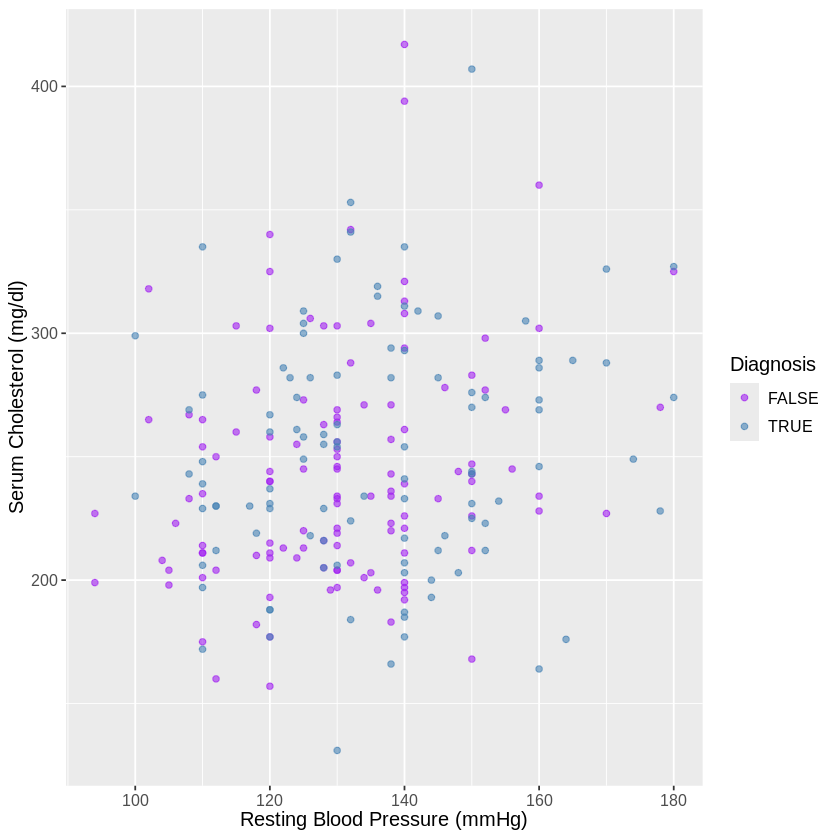

In [9]:
#plotting the data into a scatterplot
cleveland_plot <- ggplot(cleveland_train, aes(x = trestbps, y = chol, color = num)) +
    geom_point(alpha = 0.6) +
    labs(x = "Resting Blood Pressure (mmHg)",
         y = "Serum Cholesterol (mg/dl)",
         color = "Diagnosis") +
    scale_color_manual(values = c("purple", "steelblue")) +
    theme(text = element_text(size = 12))
cleveland_plot

## Methods

This project uses the processed.cleveland.data obtained from the Heart Disease Database to predict the likeliness of a patient from Cleveland to have heart disease. The predictors that will be used for the classification are serum cholesterol levels and resting blood pressure.

To wrangle the data, I first replaced all "?" to NAs. Then I converted the variables into their correct data types according to the original variable information from the database. There are no column names in the processed data, thus, I created column names using the information given. Since num uses integers to distinguish the presence (1,2,3,4) from absence (0) of heart disease, and I want to determine whether or not a patient has heart disease, I converted the variable into a factor type that diagnoses heart disease as TRUE (presence) or FALSE (absence).

I used the function initial_split() to split the dataframe into 75% training and 25% testing data, stratifying for num. 

To summarize the data, I grouped by num, then calculated the mean for each predictor, chol and trestbps. Patient count was included as well to determine if there was a similar ratio of heart disease presence and absence. To visualize the relationship between cholesterol levels and resting blood pressure in the data, a scatter plot was generated with colour identifying the absence and presence of heart disease.

For further analysis, the data will undergo preprocessing, model training using the K-nearest-neighbors algorithm, model evaluation, 5-fold cross-validation and model optimization.

## Expected outcomes and signifcance

I expect to find that patients diagnosed with heart disease will likely have high levels of serum cholesterol and higher blood pressure. Furthermore, I expect to find a correlation between resting blood pressure and serum cholesterol levels based on research and the visualization. 

Having a classification system for heart disease could greatly improve doctors' ability to diagnose patients accurately and promptly, leading to earlier treatment of the disease.

Future questions this could lead to:
What measures can be taken to prevent heart disease and maintaining our health ?
Which factor contributes the most to heart disease?


## Bibliography

Heart&Stroke. (n.d.) Types of Heart Disease. https://www.heartandstroke.ca/heart-disease/what-is-heart-disease/types-of-heart-disease 

Mayo Clinic.(2022). Heart Disease. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118

Mayo Clinic. (2023). High Cholesterol. https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries.
